<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [2]:
# visualize os resultados

print(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados

estados_ex = list()
for linha in fonte.find_all('nome'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  estados_ex.append(texto_coluna)

estados = list()
for itens in estados_ex:
  estados.append(itens[0])


sigla_ex = list()
for linha in fonte.find_all('sigla'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  sigla_ex.append(texto_coluna)

sigla = list()
for itens in sigla_ex:
  sigla.append(itens[0])


regiao_ex = list()
for linha in fonte.find_all('regiao'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  regiao_ex.append(texto_coluna)

regiao = list()
for itens in regiao_ex:
  regiao.append(itens[0])

In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado', 'sigla', 'regiao']] + list(map(lambda estado, sigla, regiao: [estado, sigla, regiao], estados, sigla, regiao)))


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [32]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

cidades_df = pd.read_csv('cidades-bruto.csv', delimiter=',')

In [34]:
# visualize os resultados

cidades_df.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [40]:
dados_limpos = cidades_df[cidades_df['Censo'] == 2010][['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]
dados_limpos.columns = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']


dados_limpos.head(n=10)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
5,MINAS GERAIS,Pedra Azul,1.875237e+05,26000,7212.450195
6,PIAUÍ,Teresina,8.700461e+06,802537,10841.200195
7,PIAUÍ,Amarante,6.532289e+04,17892,3650.949951
8,GOIÁS,Matrinchã,4.591055e+04,4420,10387.000000
9,PERNAMBUCO,Cachoeirinha,8.043380e+04,18123,4438.220215


In [39]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

dados_limpos.to_csv('cidades-limpo.csv', sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [43]:
# solução do exercício 1.3

cidades_df = pd.read_csv('cidades-limpo.csv', delimiter= ';')
estados_df = pd.read_csv('estados-limpo.csv', delimiter= ';')

In [44]:
cidades_df.head()

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000


In [45]:
estados_df.head()

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [46]:
pd.concat([cidades_df[['estado']], estados_df[['estado']]])

,estado
0,BAHIA
1,RIO GRANDE DO SUL
2,ESPIRITO SANTO
3,MINAS GERAIS
4,PIAUÍ
...,...
22,SANTA CATARINA
23,SAO PAULO
24,SERGIPE
25,TOCANTINS


In [56]:
brasil_df = pd.merge(left=cidades_df, right=estados_df, on='estado', how='outer')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [81]:
# solução do exercício 2.1

brasil_df.to_csv('brasil.csv')


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [58]:
brasil_df.nlargest(10, 'populacao')[['cidade', 'populacao']]

,cidade,populacao
3271,São Paulo,389317152.0
4504,Rio de Janeiro,175739344.0
5554,Brasília,131487264.0
4849,Curitiba,45762420.0
1735,Belo Horizonte,44595204.0
3720,Manaus,40486108.0
500,Porto Alegre,37787912.0
44,Salvador,32824228.0
3223,Guarulhos,32473828.0
4221,Fortaleza,31789186.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [59]:
df_nordeste = (brasil_df.loc[brasil_df['regiao'] == 'NORDESTE'])
df_nordeste.nsmallest(5, ['pib_percapita'])[['cidade', 'pib_percapita']]

,cidade,pib_percapita
362,Caetanos,2440.570068
369,Novo Triunfo,2497.060059
260,Matina,2551.989990
5152,Traipu,2649.479980
211,Mansidão,2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [61]:
df_saopaulo = (brasil_df.loc[brasil_df['estado'] == 'SÃO PAULO'])
df_saopaulo.nlargest(15, ['pib'])[['cidade', 'pib']]

,cidade,pib
3271,São Paulo,11037593.0
3223,Guarulhos,1299283.0
3340,Campinas,1064669.0
2810,São Bernardo do Campo,810979.0
3106,Osasco,718646.0
2816,Santo André,673396.0
2994,São José dos Campos,615871.0
3152,Sorocaba,584313.0
2754,Ribeirão Preto,563107.0
2823,São José do Rio Preto,419632.0


 - Qual é o PIB do estado de Santa Catarina?

In [71]:
df_sc = (brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA'])
soma = df_sc['pib'].sum()
display(soma)

6118743.0

 - Qual é o população da região sul?

In [73]:
df_populacao = (brasil_df.loc[brasil_df['regiao'] == 'SUL'])
soma_pop = df_populacao['populacao'].sum()
display(soma_pop)

345670134.1582031

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [76]:
pib_ms = (brasil_df.loc[brasil_df['estado'] == 'MATO GROSSO DO SUL'])
pib_medio = pib_ms['pib_percapita'].sum() / 8
print(pib_medio)

140974.24438476254


 - Qual é a população do Brasil?

In [77]:
populacao_br = brasil_df['populacao'].sum()
display(populacao_br)

3236161767.4887695

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='populacao', ylabel='cidade'>

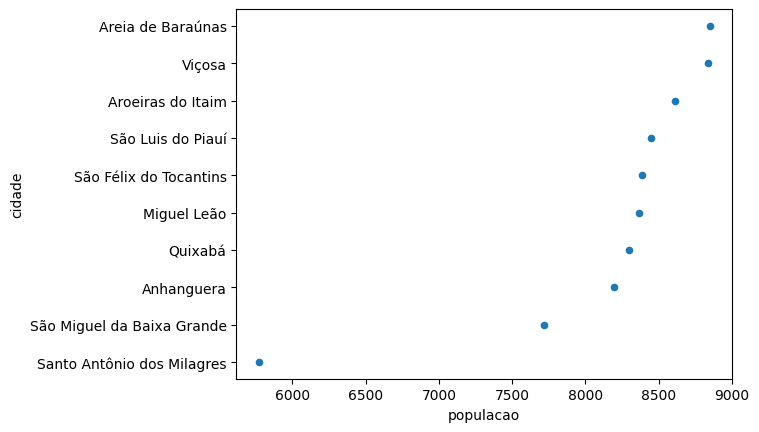

In [78]:
import matplotlib.pyplot as plt

cidades_min = brasil_df.nsmallest(10, 'populacao')[['cidade', 'populacao']]
cidades_min.plot.scatter(x='populacao', y='cidade', colormap='viridis')


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

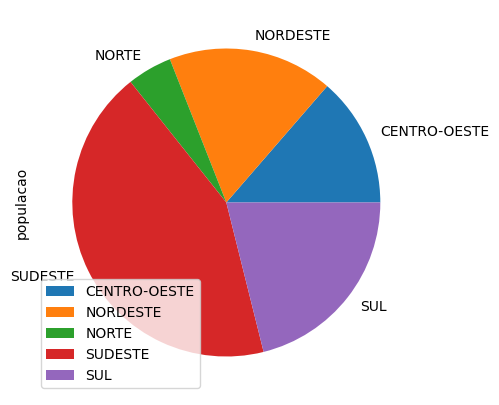

In [79]:
brasil_df[['regiao', 'populacao']].groupby('regiao').agg('sum').plot.pie(y='populacao', figsize=(5,5))